<a href="https://colab.research.google.com/github/AyantikaChatt/world_happiness_index/blob/main/happiness_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Data_Analysis/Kaggle_world_happiness/World_Happiness_Report_2022[1].csv')

In [6]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [7]:
df.columns


Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [8]:
#shorten column names
features_short = ['RANK', 'Country', 'Happiness_score', 'Whisker-high', 'Whisker-low',
       'Dystopia_1.83_residual', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_of_choices', 'Generosity', 'Perceptions_corruption']

In [9]:
df.columns=features_short

In [11]:
features = [#'RANK', 'Country',
          'Happiness_score', 'Whisker-high', 'Whisker-low',
       'Dystopia_1.83_residual', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_of_choices', 'Generosity', 'Perceptions_corruption']


In [12]:
df[features].describe()

,Happiness_score,Whisker-high,Whisker-low,Dystopia_1.83_residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_of_choices,Generosity,Perceptions_corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


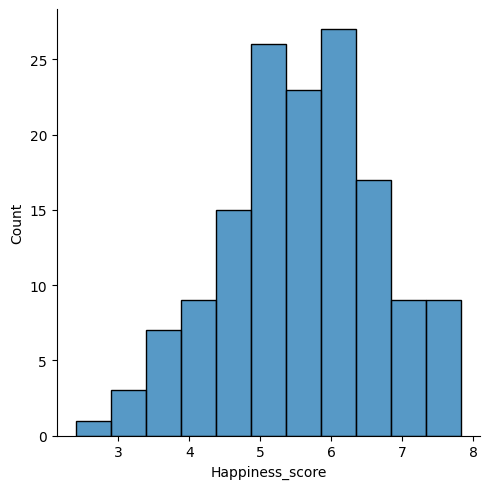

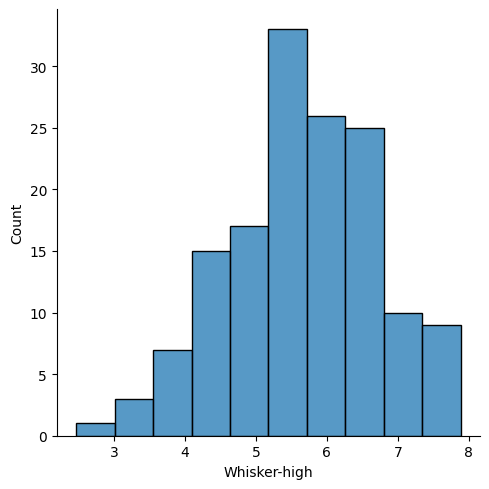

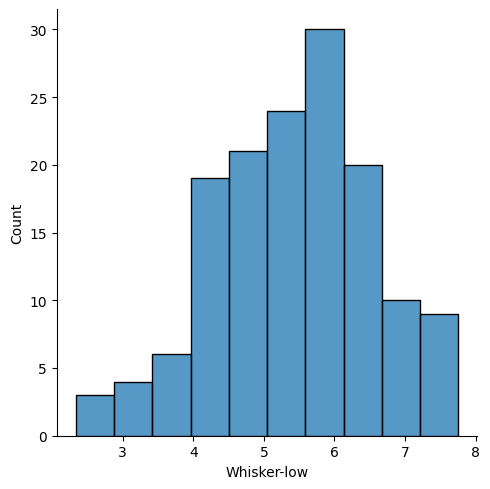

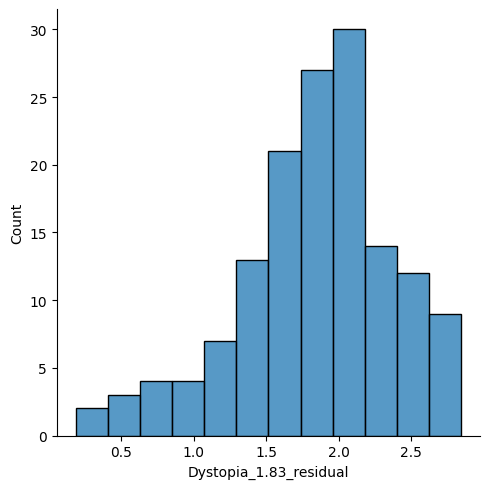

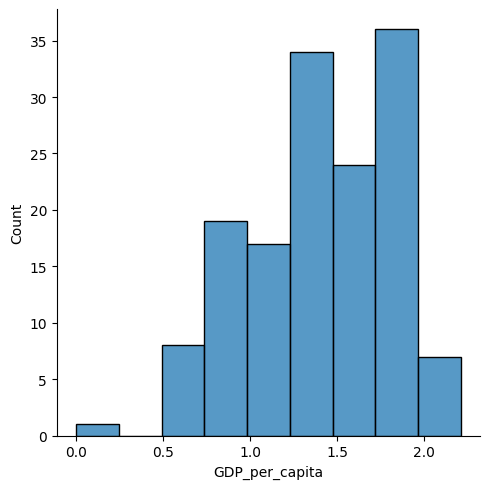

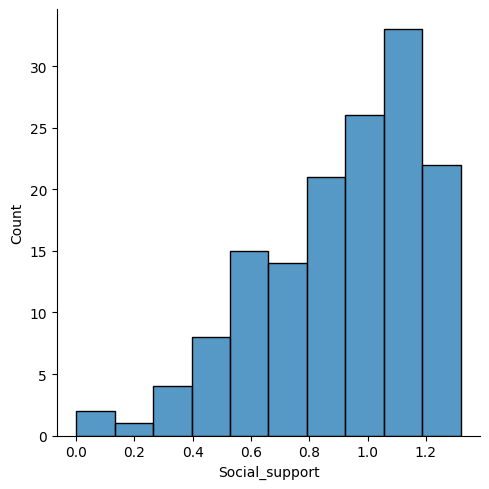

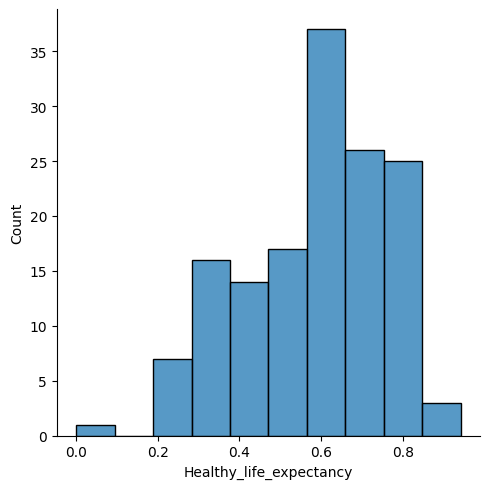

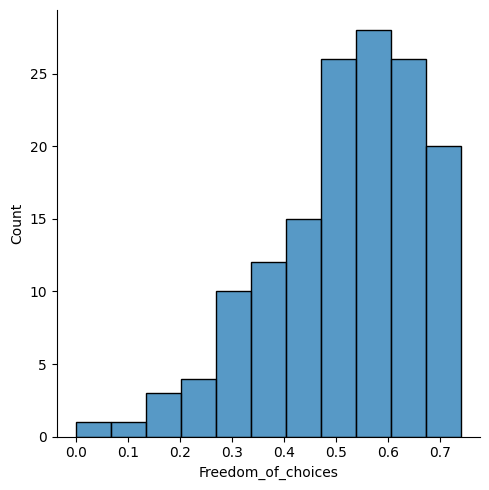

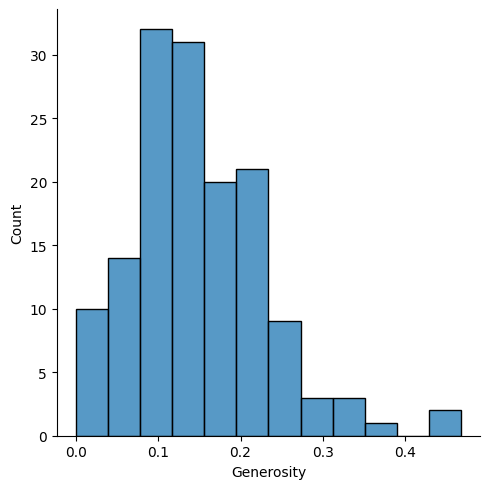

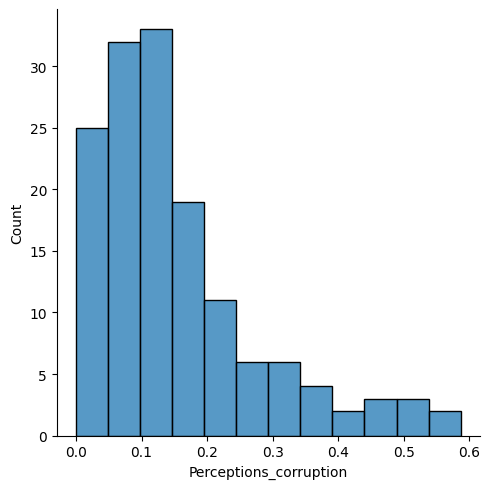

In [14]:
for feature in features:
  sns.displot(data=df, x=feature)

In [15]:
df['Happiness_score'].describe()

count    146.000000
mean       5.553575
std        1.086843
min        2.404000
25%        4.888750
50%        5.568500
75%        6.305000
max        7.821000
Name: Happiness_score, dtype: float64

In [17]:
df['happiness_score_bins']=pd.cut(df['Happiness_score'],bins=[0, 4.88, 5.57, 6.31, 7.82], labels=['group1', 'group2', 'group3', 'group4'])


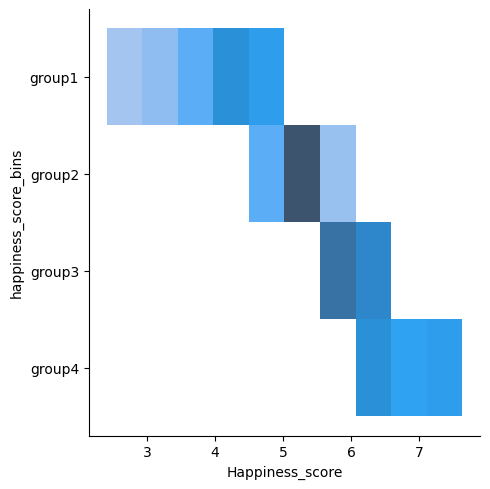

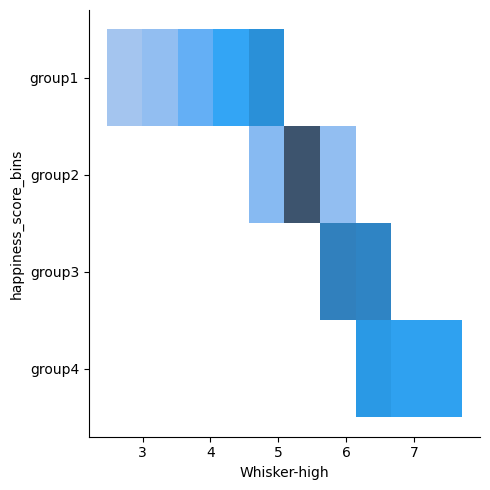

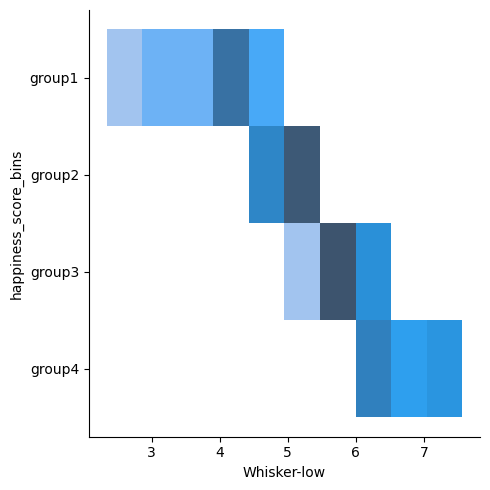

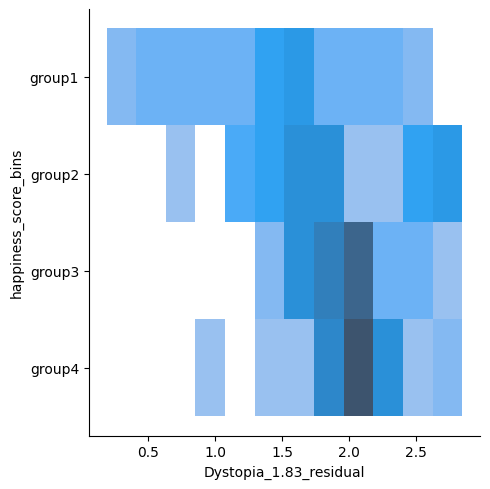

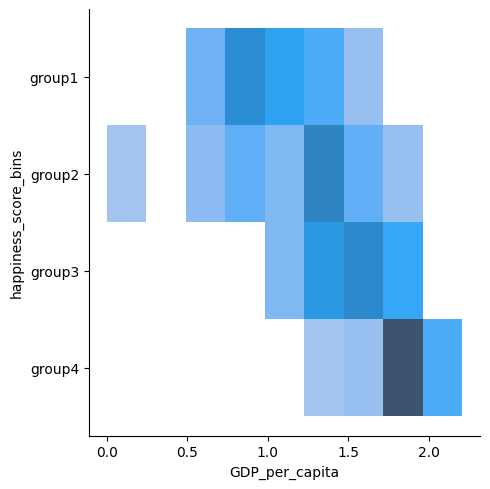

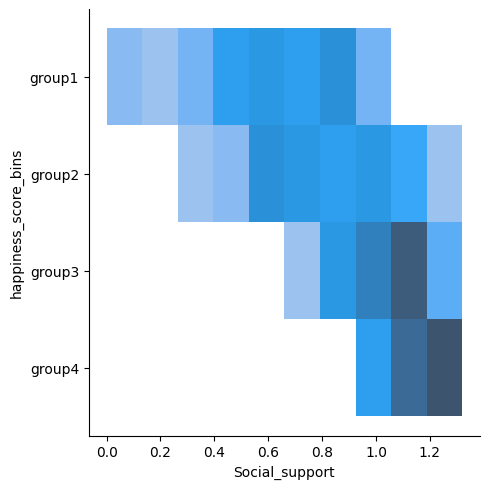

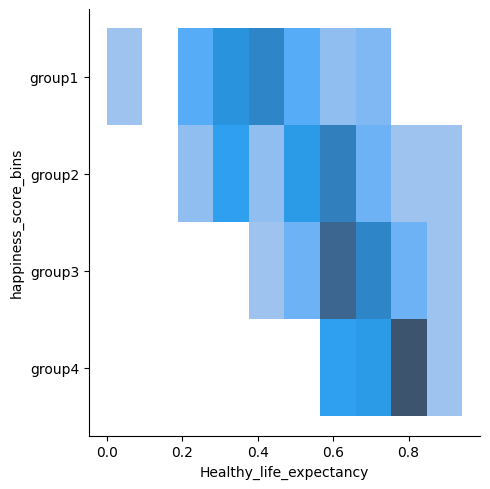

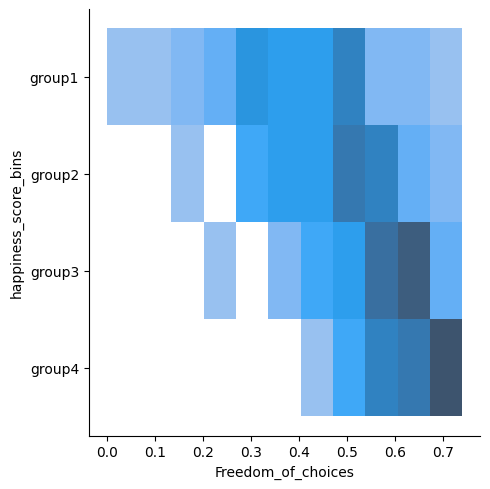

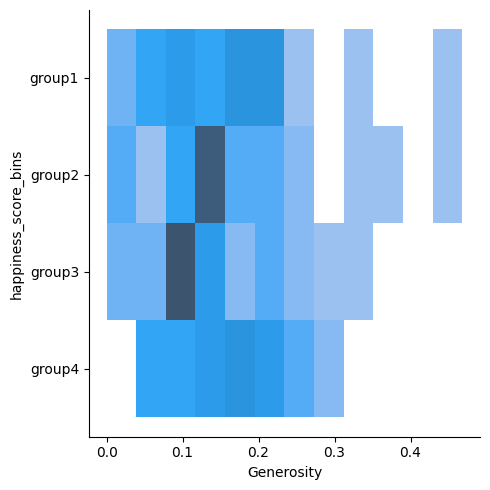

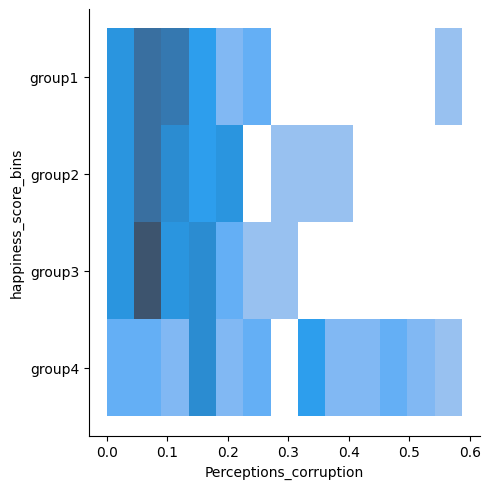

In [20]:
#separate by bins created
for feature in features:
 sns.displot(data=df, x=feature, y='happiness_score_bins')

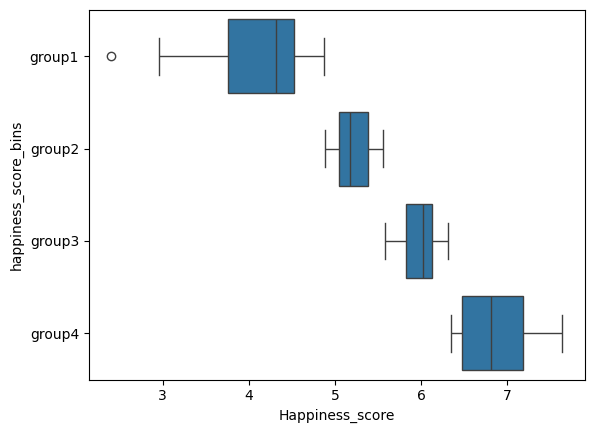

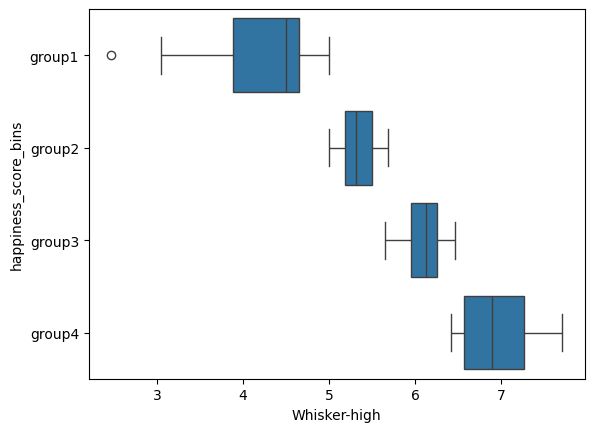

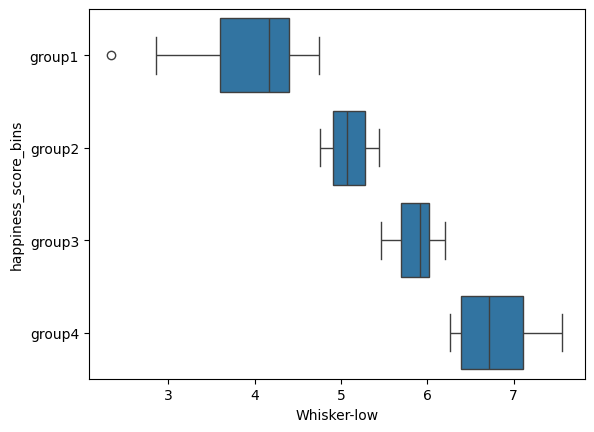

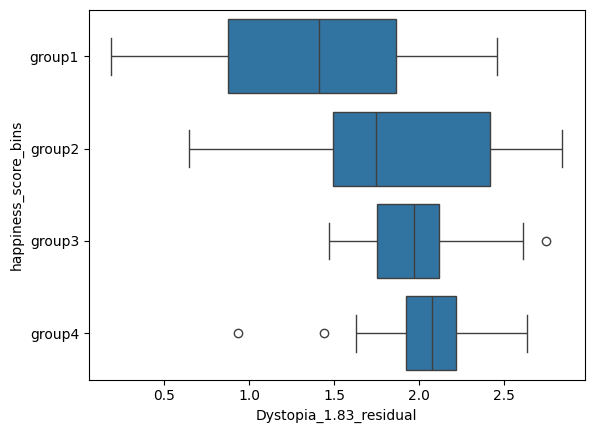

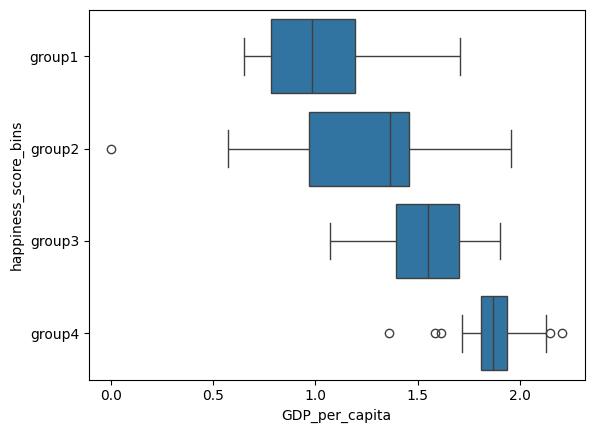

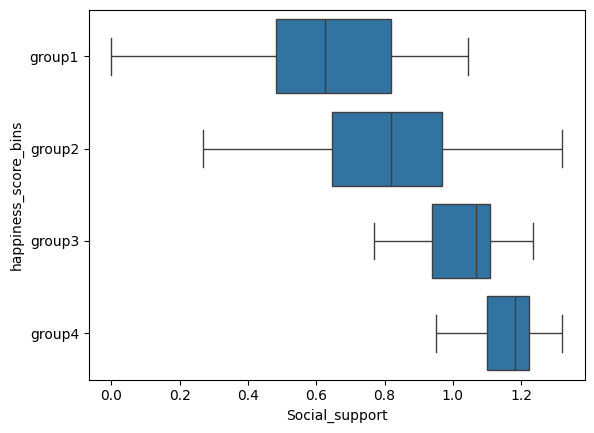

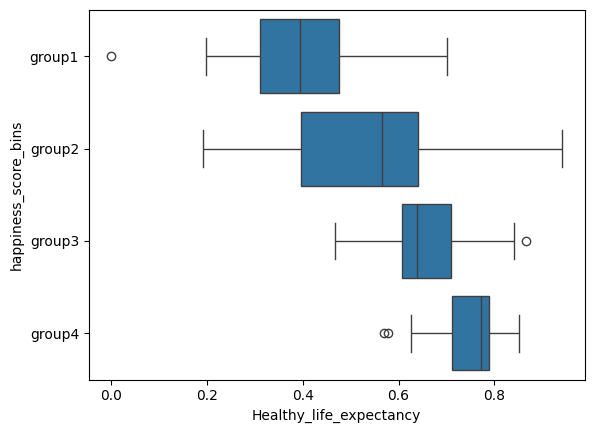

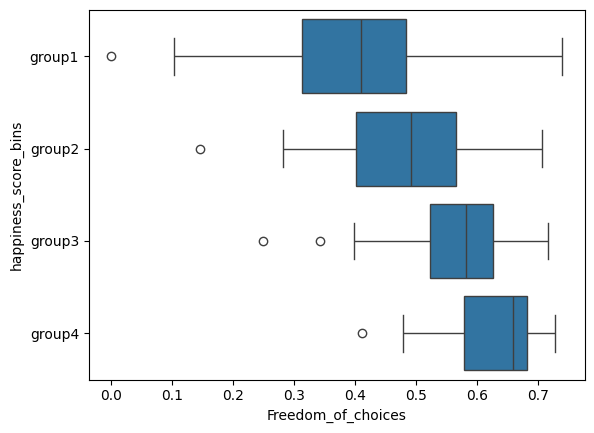

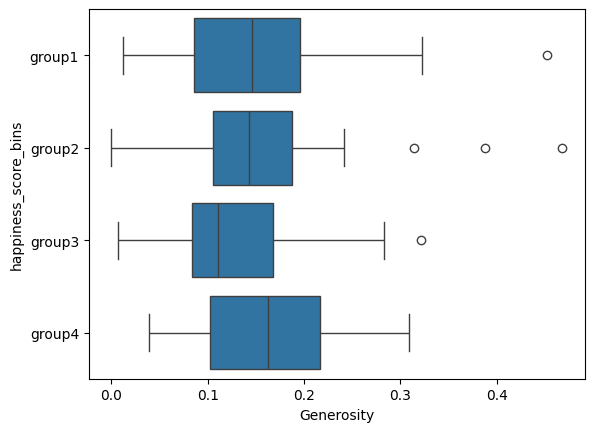

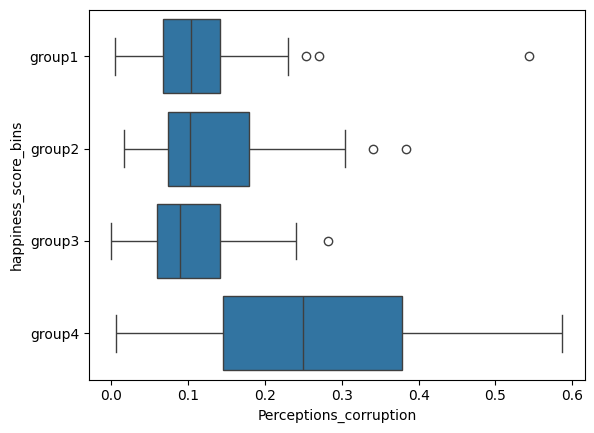

In [22]:
#same data but represented as box plots
for feature in features:
 sns.boxplot(data=df, x=feature, y='happiness_score_bins')
 plt.show()

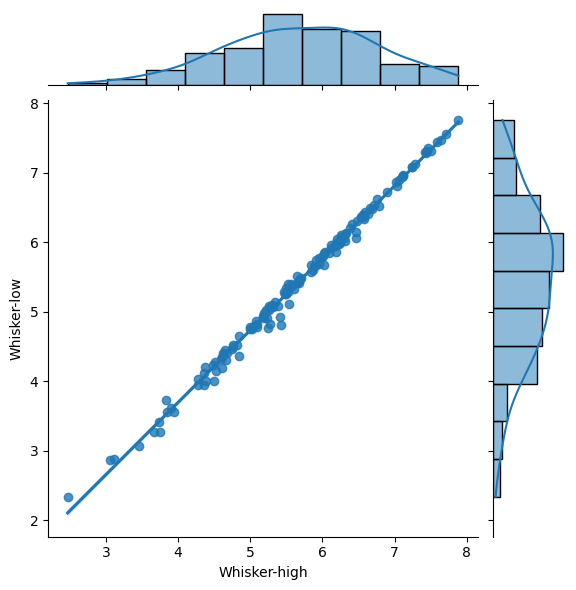

In [27]:
#bivariate analysis
sns.jointplot(data=df, x='Whisker-high',y='Whisker-low', kind='reg')


In [28]:
# a high correlation is observed (since there are minimal number of outlier data

df.columns

Index(['RANK', 'Country', 'Happiness_score', 'Whisker-high', 'Whisker-low',
       'Dystopia_1.83_residual', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_of_choices', 'Generosity',
       'Perceptions_corruption', 'happiness_score_bins'],
      dtype='object')

In [45]:
features = ['Dystopia_1.83_residual', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_of_choices', 'Generosity', 'Perceptions_corruption', 'Happiness_score']

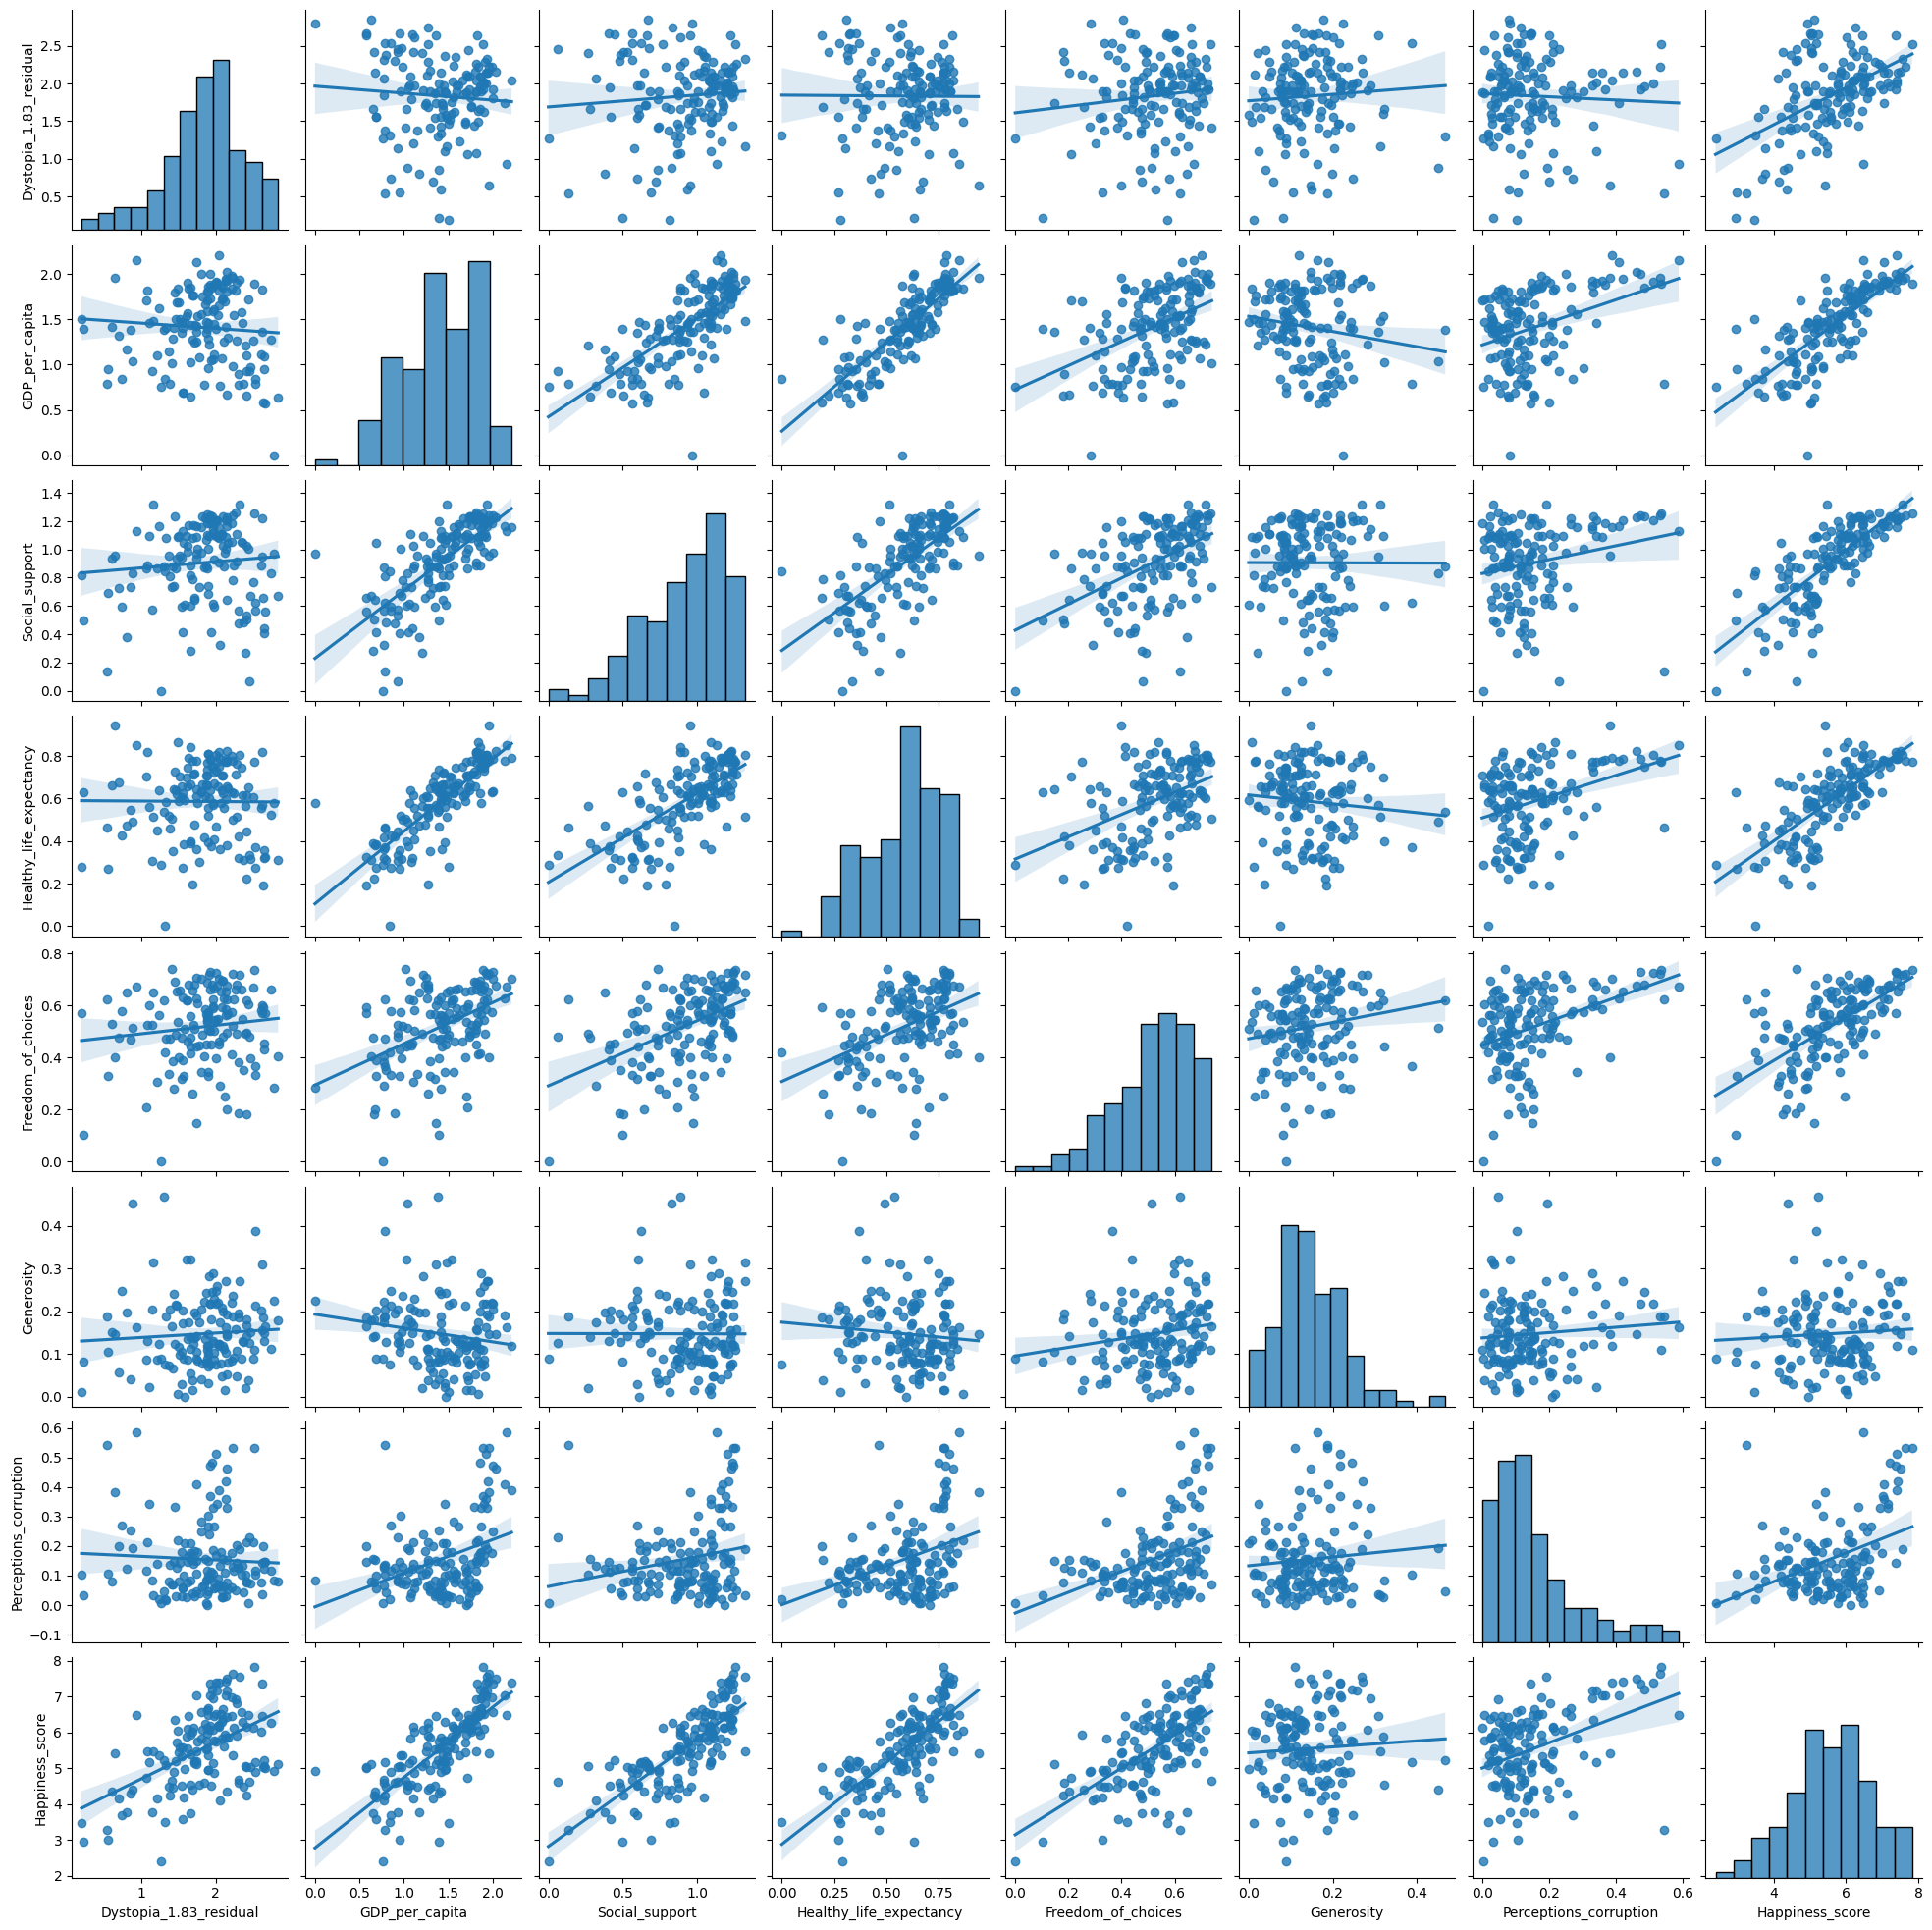

In [46]:
sns.pairplot(df[features], kind='reg')

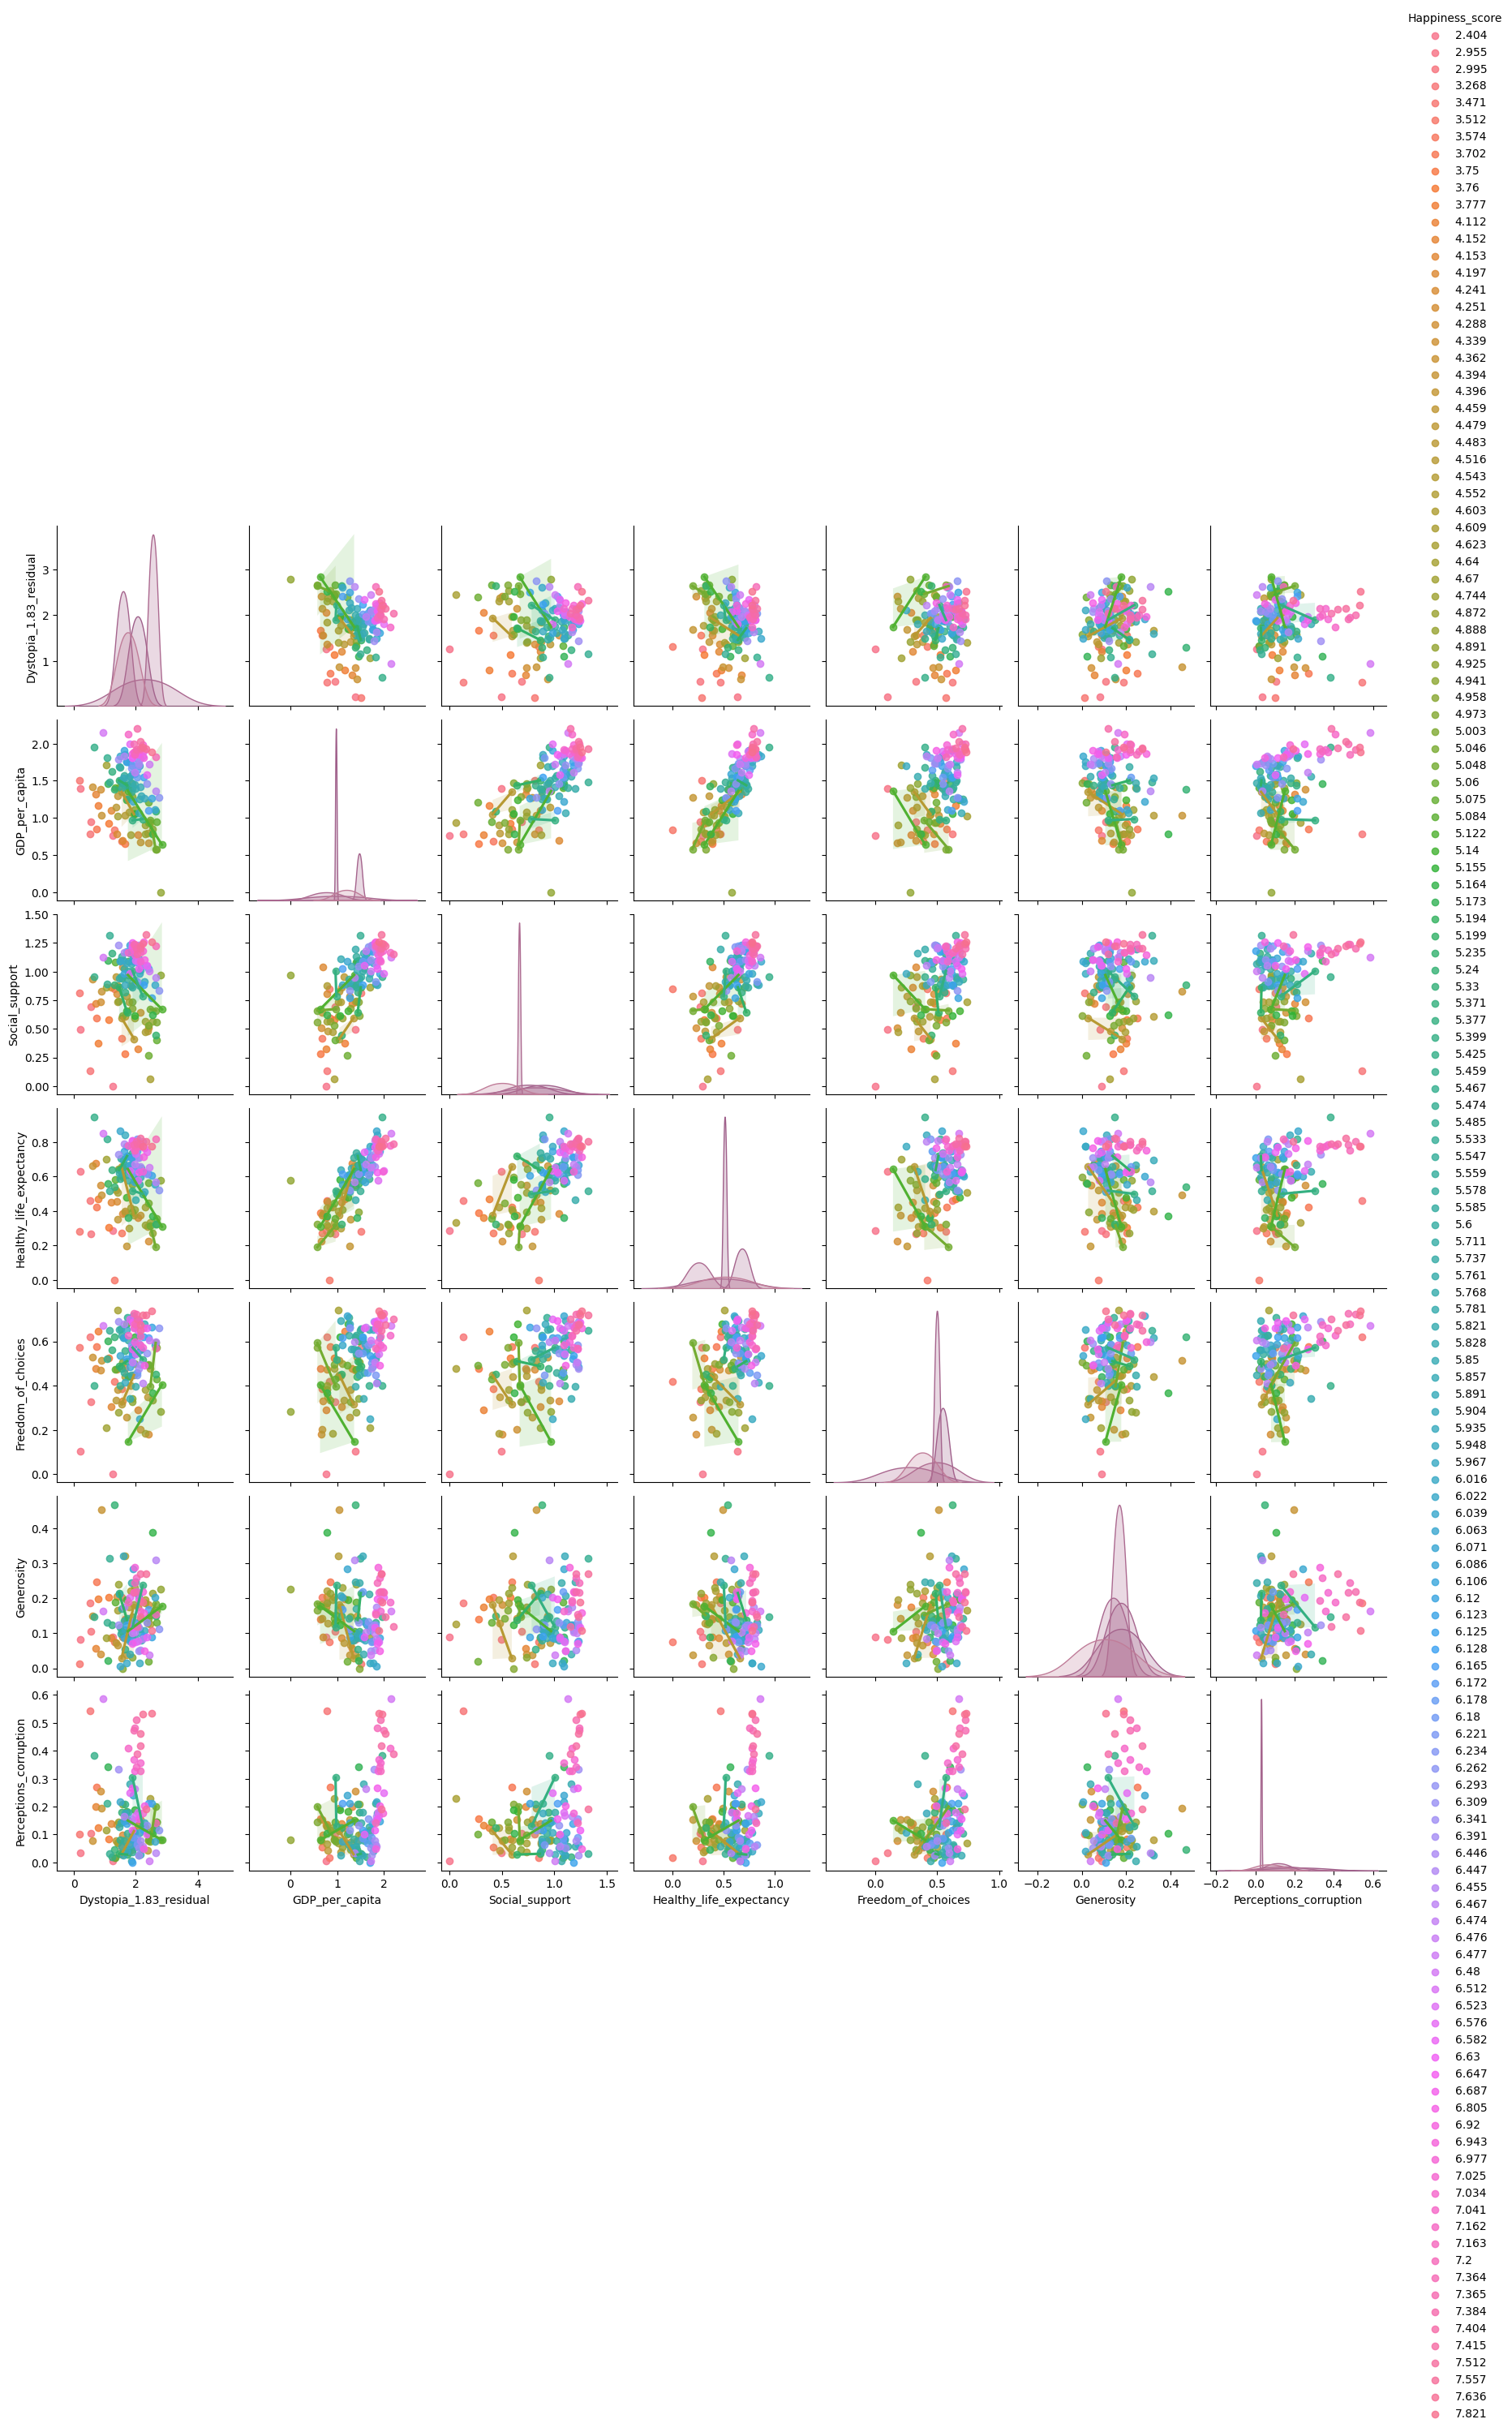

In [51]:
sns.pairplot(df[features], hue='Happiness_score', kind='reg')

<Axes: >

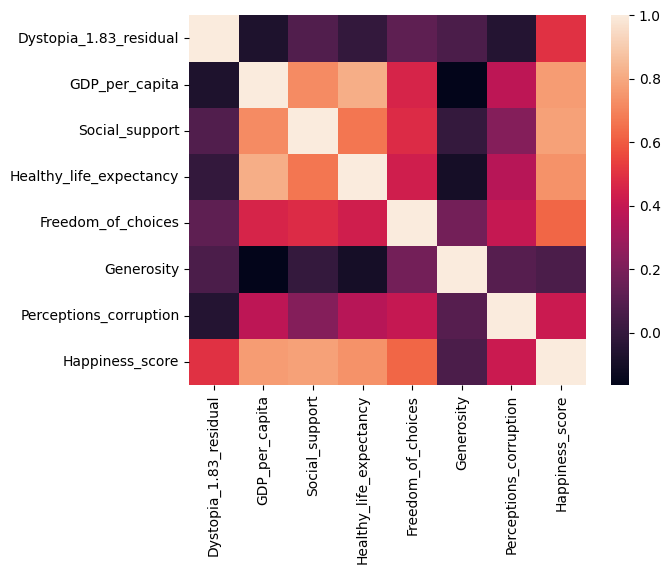

In [52]:
sns.heatmap(df[features].corr())

In [53]:
df[features].corrwith(df['Happiness_score']).sort_values(ascending=False)

Happiness_score            1.000000
Social_support             0.777889
GDP_per_capita             0.763677
Healthy_life_expectancy    0.740260
Freedom_of_choices         0.624822
Dystopia_1.83_residual     0.498990
Perceptions_corruption     0.416216
Generosity                 0.063785
dtype: float64

In [54]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.2 MB/s eta 0:00:00


In [55]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00
